# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split


# Load Data

In [2]:
train_data = pd.read_csv('./TinyMNIST/trainData.csv' , header = None)
train_label = pd.read_csv('./TinyMNIST/trainLabels.csv' , header = None)
test_data = pd.read_csv('./TinyMNIST/testData.csv' , header = None)
test_label = pd.read_csv('./TinyMNIST/testLabels.csv' , header = None)

# Feature Selection
## a) Backward Elimination

In [3]:
final_score_backward = list()
final_comb = list()

number_of_columns = train_data.shape[1]
cols = list(np.arange(0,number_of_columns))
######################################################## Accuracy with all features ######################################################

temp_cols = list()
scores = list()
train_data_temp = train_data.iloc[:,cols]
test_data_temp = test_data.iloc[:,cols]
gnb = GaussianNB()
gnb.fit(train_data, train_label)
score = gnb.score(test_data , test_label)
final_score_backward.append(score)
final_comb.append(cols)

############################################ Accuracy when we remove features(Apply Backward Elimination) ###############################
for i in range(number_of_columns-1):
    combin = list()
    scores = list()
    all_poisible_comb = list(combinations(cols,len(cols)-1))
    for comb in all_poisible_comb: 
        comb = list(comb)
        train_data_temp = train_data.iloc[:,comb]
        test_data_temp = test_data.iloc[:,comb]
        gnb = GaussianNB()
        gnb.fit(train_data_temp, train_label)
        score = gnb.score(test_data_temp , test_label)
        scores.append(score)
        combin.append(comb)
    
    max_score = max(scores)
    scores = np.array(scores)
    arg_max_score = np.argmax(scores)
    final_score_backward.append(max_score)
    final_comb.append(combin[arg_max_score])
    cols = combin[arg_max_score]

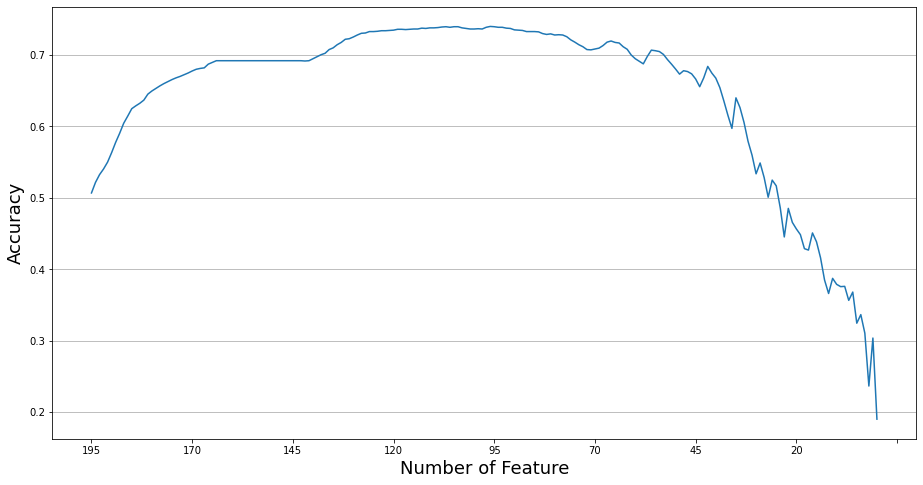

In [5]:
x_ticks = [str(x) for x in (list(range(number_of_columns-1,-1,-1)))]
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(x_ticks, final_score_backward)
ax.set_xlabel('Number of Feature', size=18)
ax.set_ylabel('Accuracy', size=18)
ax.set_title('' , fontweight='bold' , size=15)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.grid(axis='y')
plt.show()

In [6]:
final_ac_backward = np.array(final_score_backward)
print(f'The highest accuracy is {max(final_score_backward)*100}% and the number of features is {196-np.argmax(final_ac_backward)}')
print(f'Number of Removed Features: {np.argmax(final_ac_backward)}')
print(f'the chosen features are:  \n {final_comb[np.argmax(final_ac_backward)]}')

The highest accuracy is 74.0% and the number of features is 97
Number of Removed Features: 99
the chosen features are:  
 [7, 9, 10, 11, 19, 22, 23, 24, 25, 26, 31, 33, 34, 35, 36, 37, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 53, 55, 59, 60, 61, 63, 66, 67, 68, 69, 70, 71, 74, 75, 77, 78, 80, 82, 85, 87, 88, 89, 90, 91, 92, 95, 97, 101, 102, 103, 104, 105, 106, 107, 110, 112, 114, 116, 117, 118, 119, 120, 121, 130, 131, 132, 135, 136, 138, 140, 142, 143, 144, 148, 151, 152, 156, 161, 170, 175, 177, 179, 180, 185, 186, 187, 188, 189, 190, 192, 193]


## b)Forward Selection

In [7]:
cols = list(train_data.columns)
final_comb = list()
final_score_forward = list()


for iter in range(number_of_columns):
    
    all_temp_feature = list()
    scores = list()
    for feature in cols:
        selected_cols = final_comb.copy()
        selected_cols.append(feature)
        train_data_temp = train_data.iloc[:,selected_cols]
        test_data_temp = test_data.iloc[:,selected_cols]
        gnb = GaussianNB()
        gnb.fit(train_data_temp, train_label)
        score = gnb.score(test_data_temp , test_label)
        scores.append(score)
        all_temp_feature.append(feature)
        
    max_score = max(scores)
    final_score_forward.append(max_score)
    scores = np.array(scores)
    arg_max_score = np.argmax(scores)
    final_comb.append(all_temp_feature[arg_max_score])
    cols.remove(all_temp_feature[arg_max_score])
    #final_comb.append(list(set(list(train_data.columns)) - set(cols)))

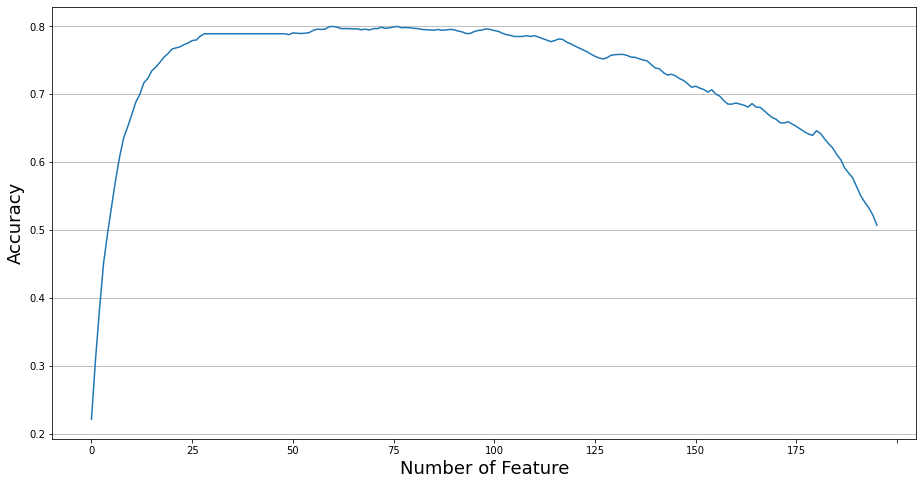

In [8]:
x_ticks = [str(x) for x in (list(range(0,number_of_columns)))]
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(x_ticks, final_score_forward)
ax.set_xlabel('Number of Feature', size=18)
ax.set_ylabel('Accuracy', size=18)
ax.set_title('' , fontweight='bold' , size=15)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.grid(axis='y')
plt.show()

In [9]:
final_ac_forward = np.array(final_score_forward)
print(f'The highest accuracy is {max(final_score_forward)*100}% and the number of features is {np.argmax(final_ac_forward)}')
print(f'the chosen features are:  \n {final_comb[:np.argmax(final_ac_forward)]}')

The highest accuracy is 79.96% and the number of features is 60
the chosen features are:  
 [35, 102, 91, 106, 131, 89, 49, 104, 47, 65, 132, 63, 74, 133, 52, 162, 135, 76, 77, 78, 144, 149, 116, 61, 118, 64, 90, 75, 148, 0, 1, 2, 3, 12, 13, 14, 15, 27, 28, 84, 98, 154, 167, 168, 181, 182, 183, 194, 195, 120, 51, 134, 147, 80, 101, 103, 46, 60, 79, 48]


# Feature Extraction
## PCA

#### Accuracy without Feature Extraction

In [11]:
model = GaussianNB()
model.fit(train_data,train_label)
print('CCR is {:.2f}' .format(model.score(test_data,test_label)))

CCR is 0.51


### Concatenate train and test Data

In [12]:
all_data = np.concatenate((train_data,test_data),axis=0)
all_labels = np.concatenate((train_label,test_label),axis=0)

In [13]:
Centered = lambda x : x - x.mean(axis=0)
Centered_X =  Centered(all_data)


def ScatterVariance(x,normalize=False):
    if normalize:
        return (x.T.dot(x))/len(x)
    else:
        return (x.T).dot(x)

#### eigen Value corresponding to each feature(Column)

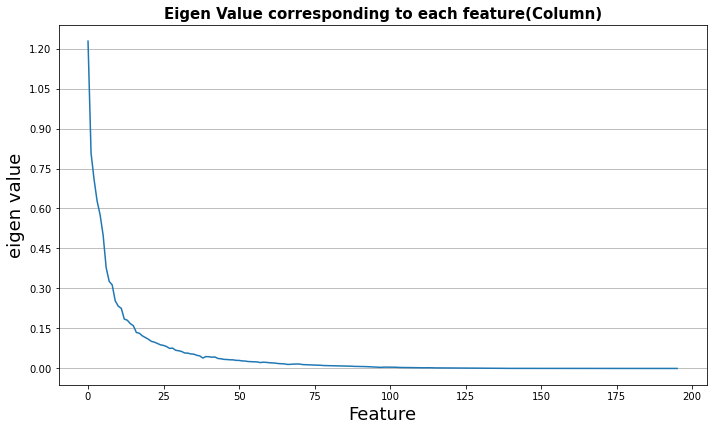

In [14]:
eigenvalues,eigenvectors = np.linalg.eig(ScatterVariance(Centered_X,True))

fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
x_axis = np.arange(0,train_data.shape[1])
ax.plot(x_axis , eigenvalues)
ax.set_xlabel('Feature', size=18)
ax.set_ylabel('eigen value', size=18)
ax.set_title('Eigen Value corresponding to each feature(Column)' , fontweight='bold' , size=15)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.grid(axis='y')
plt.show()

#### Optimum number of features for maximum accuracy

In [15]:
acc = list()
num_of_all_features = train_data.shape[1]

for optimal_features in range(1,num_of_all_features+1): 
    
    Mapped_data = (all_data).dot(eigenvectors[:,:optimal_features])  
    new_data_train, new_data_test, new_label_train, new_label_test = train_test_split( Mapped_data, all_labels, test_size=0.3, random_state=42)
    
    model = GaussianNB()
    model.fit(new_data_train,new_label_train.ravel())
    accuracy = model.score(new_data_test,new_label_test.ravel())*100
    acc.append(accuracy)

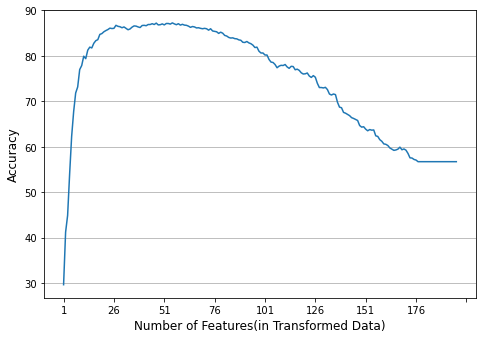

In [16]:
###############################################################  Plot Accuracy vs Mapping Feature of Data  #####################################################################
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [str(x) for x in list(range(1,num_of_all_features+1))]
ax.plot(x_axis , acc)
ax.set_xlabel('Number of Features(in Transformed Data)', size=12)
ax.set_ylabel('Accuracy', size=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.grid(axis='y')
plt.show()

In [17]:
optimal_features = np.argmax(acc)
print('optimal feature number is {} and corresponding accuracy with these features is {:.2f}%'.format(optimal_features+1,acc[optimal_features]))

optimal feature number is 55 and corresponding accuracy with these features is 87.24%


# Summary of accuracies:
* (Feature Selection) Backward Elimination with 97 features based on Naive Bayes: 74%
* (Feature Selection) Forward Selection with 60 features based on Naive Bayes: 79.96%
* (Feature Extraction) PCA with 55 features: 87.24%